## Summary Statistics
Logistic regression sample: HERON data extract

Remaining TODOs:
- chart reviews
- formalize LOR vs LOT
- assess need for transformations (likely, heavily right tailed; natural log should take care of it)
- Withdraw age < 14 (after chart review)
- handle outliers (will heavily weight regression coefficients)
- fill in some NAs with [0] when appropriate for modeling purposes (i.e. historical diagnoses)

In [ ]:
#load packages
#build sqldf package from anaconda python distribution

In [1]:
#import data
setwd("C:/Users/MB047320/OneDrive - Cerner Corporation/KUMC/Dissertation/data/Mark_dissertation_20170718/")
master <- read.csv('master.csv', stringsAsFactors = FALSE)
concussion_dx <- read.csv('concussion_dx_cohort.csv', stringsAsFactors = FALSE)
demo <- read.csv('Mark_dissertation_20170718-patient.csv', stringsAsFactors = FALSE)
enc_loc <- read.csv('encounter_location.csv', stringsAsFactors = FALSE)
med_hx <- read.csv('medical_history.csv', stringsAsFactors = FALSE)
results <- read.csv('results.csv', stringsAsFactors = FALSE)
notes <- read.csv('text_notes.csv', stringsAsFactors = FALSE)
log_reg <- read.csv('logistic_regression_data_cleaned.csv') #current working dataset

In [2]:
head(master, 30)

patient_num,encounter_num,valtype,tval,nval,units,code,modifier,instance,start_date,end_date,sourcesystem_cd,sub_encounter,variable,variable_index,code_label,modifier_label
1906267,36074948,@,,NA,,DEM|AGE:1,@,1,2/17/16 0:00,2/17/16 0:00,Epic@kumed.com,fabricated_for_Z2231824,Age,214,1 year old,
1031466,35162363,@,,NA,,DEM|AGE:1,@,1,11/3/15 0:00,11/3/15 0:00,Epic@kumed.com,fabricated_for_Z2209762,Age,214,1 year old,
1425589,35568514,@,,NA,,DEM|AGE:4,@,1,12/30/12 0:00,12/30/12 0:00,Epic@kumed.com,fabricated_for_Z1982967,Age,214,4 years old,
1861635,36023114,@,,NA,,DEM|AGE:4,@,1,1/14/13 0:00,1/14/13 0:00,Epic@kumed.com,fabricated_for_Z1985797,Age,214,4 years old,
1421391,35563695,@,,NA,,DEM|AGE:4,@,1,8/24/12 0:00,8/24/12 0:00,Epic@kumed.com,fabricated_for_Z1959040,Age,214,4 years old,
1856047,36016970,@,,NA,,DEM|AGE:4,@,1,8/6/12 0:00,8/6/12 0:00,Epic@kumed.com,fabricated_for_Z1955082,Age,214,4 years old,
1430524,35573892,@,,NA,,DEM|AGE:4,@,1,5/19/13 0:00,5/19/13 0:00,Epic@kumed.com,fabricated_for_Z2009456,Age,214,4 years old,
1450498,35598007,@,,NA,,DEM|AGE:5,@,1,10/15/14 0:00,10/15/14 0:00,Epic@kumed.com,fabricated_for_Z2121811,Age,214,5 years old,
1866793,36028941,@,,NA,,DEM|AGE:5,@,1,6/14/13 0:00,6/14/13 0:00,Epic@kumed.com,fabricated_for_Z2014317,Age,214,5 years old,
1862761,36024388,@,,NA,,DEM|AGE:5,@,1,2/13/13 0:00,2/13/13 0:00,Epic@kumed.com,fabricated_for_Z1991929,Age,214,5 years old,


In [3]:
head(log_reg, 15)

X,patient_num,LOR,age,sex.m,historical_conditionADHD,historical_conditionADHD..attention.deficit.hyperactivity.disorder.,historical_conditionAnxiety,historical_conditionAnxiety.and.depression,historical_conditionAnxiety.attack,...,IMPACT_REACTION_TIME,IMPACT_TOTAL_SYMPTOM,IMPACT_VISUAL_MOTOR,CONCUSSION_SCORE_TOTAL_BALANCE_ERRORS,CONCUSSION_SCORE_CONCENTRATION_TOTAL,CONCUSSION_SCORE_DELAYED_RECALL,CONCUSSION_SCORE_IMMEDIATE_MEMORY,CONCUSSION_SCORE_TOTAL_COGNITION,CONCUSSION_SYMPTOMS_TOTAL_NUMBER,CONCUSSION_SYMPTOMS_TOTAL_SCORE
1,851,7,18,0,NA,NA,NA,NA,NA,...,0.55,38,45.13,NA,NA,NA,NA,NA,12,40
2,1060,58,19,0,0,0,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1865,30,17,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2589,0,19,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,4088,0,18,1,NA,NA,NA,NA,NA,...,1.51,29,27.13,20,0,4,13,17,8,29
6,4254,53,40,1,0,0,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,4555,14,37,0,NA,NA,NA,NA,NA,...,0.57,3,77.00,NA,NA,NA,NA,NA,3,3
8,5741,0,16,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,8059,21,18,0,0,0,0,0,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,8456,12,19,0,0,0,0,0,0,...,0.64,0,38.40,NA,NA,NA,NA,NA,0,0


In [4]:
dim(log_reg)

[1] 1449  136

In [5]:
summary(log_reg$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   16.00   18.00   25.56   30.00   96.00 

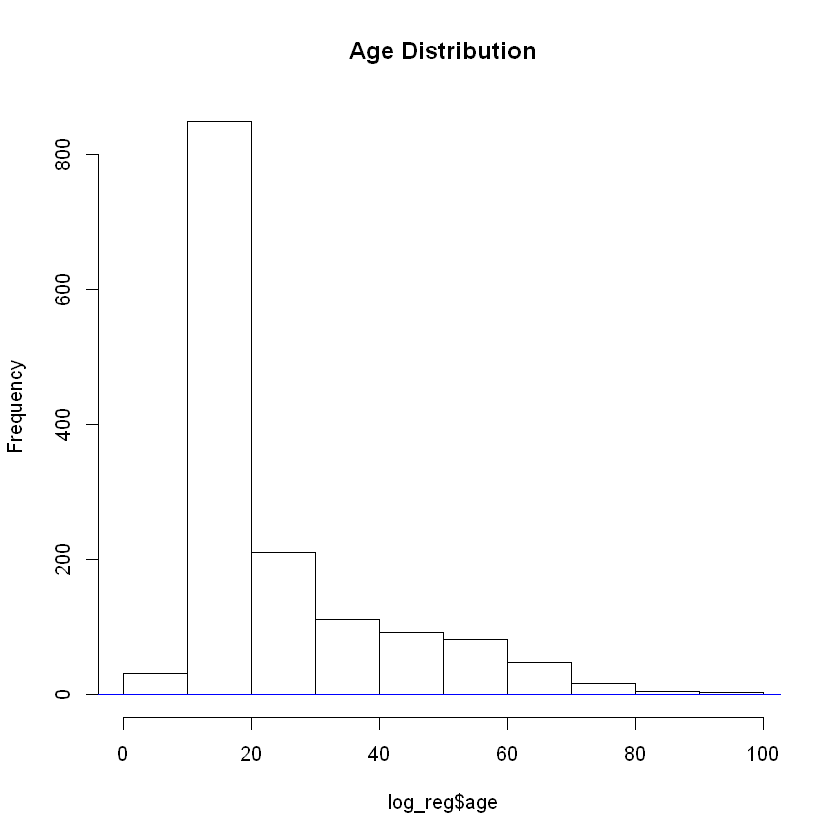

In [7]:
hist(log_reg$age, prob = FALSE, main = "Age Distribution")
points(density(log_reg$age), type = "l", col = "blue")

In [8]:
summary(log_reg$LOR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     8.0    70.9    44.0  1423.0 

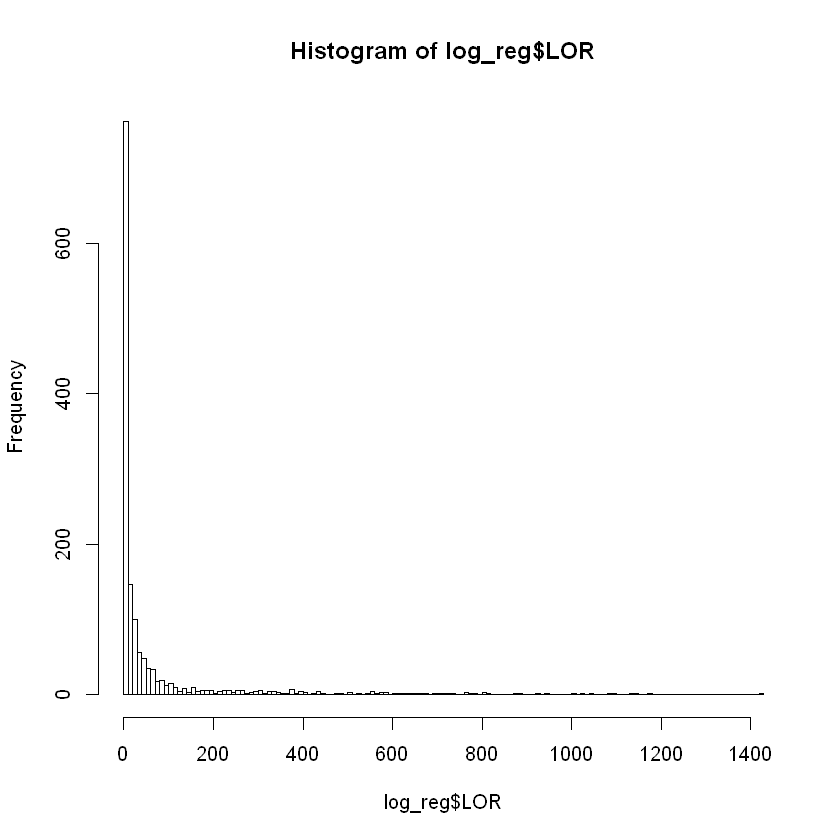

In [9]:
hist(log_reg$LOR, breaks = 150)

In [10]:
names(log_reg)

[1] "X"                                                                                   
  [2] "patient_num"                                                                         
  [3] "LOR"                                                                                 
  [4] "age"                                                                                 
  [5] "sex.m"                                                                               
  [6] "historical_conditionADHD"                                                            
  [7] "historical_conditionADHD..attention.deficit.hyperactivity.disorder."                 
  [8] "historical_conditionAnxiety"                                                         
  [9] "historical_conditionAnxiety.and.depression"                                          
 [10] "historical_conditionAnxiety.attack"                                                  
 [11] "historical_conditionAnxiety.disorder"                                                
 [12] "historical_conditionAnxious.mood"                                                    
 [13] "historical_conditionAttention.deficit.disorder..ADD."                                
 [14] "historical_conditionAttention.deficit.disorder.with.hyperactivity"                   
 [15] "historical_conditionAttention.deficit.hyperactivity.disorder..ADHD."                 
 [16] "historical_conditionClaustrophobia"                                                  
 [17] "historical_conditionClinical.depression"                                             
 [18] "historical_conditionConcussion"                                                      
 [19] "historical_conditionConcussion.with...1.hr.loss.of.consciousness"                    
 [20] "historical_conditionConcussion.with.1.24.hours.loss.of.consciousness"                
 [21] "historical_conditionConcussion.with.brief..less.than.one.hour..loss.of.consciousness"
 [22] "historical_conditionConcussion.with.brief.LOC"                                       
 [23] "historical_conditionConcussion.with.brief.LOC..initial.encounter"                    
 [24] "historical_conditionConcussion.with.brief.loss.of.consciousness"                     
 [25] "historical_conditionConcussion.with.loss.of.consciousness....30.min"                 
 [26] "historical_conditionConcussion.with.loss.of.consciousness.of.30.minutes.or.less"     
 [27] "historical_conditionConcussion.without.loss.of.consciousness"                        
 [28] "historical_conditionConcussion..unspecified"                                         
 [29] "historical_conditionDepressed"                                                       
 [30] "historical_conditionDepression"                                                      
 [31] "historical_conditionDepression..disease."                                            
 [32] "historical_conditionDyslexia"                                                        
 [33] "historical_conditionGeneralized.anxiety.disorder"                                    
 [34] "historical_conditionMigraine"                                                        
 [35] "historical_conditionMigraine.headache"                                               
 [36] "historical_conditionMigraines"                                                       
 [37] "historical_conditionMild.concussion"                                                 
 [38] "historical_conditionOCD..obsessive.compulsive.disorder."                             
 [39] "historical_conditionPanic.attacks"                                                   
 [40] "historical_conditionPsychiatric.illness"                                             
 [41] "historical_conditionPTSD..post.traumatic.stress.disorder."                           
 [42] "historical_conditionUnspecified.delay.in.development"                                
 [43] "language.arabic"                                                                     
 [4

In [11]:
max(as.Date(log_reg$eval_date))

[1] "2016-12-30"

In [12]:
min(as.Date(log_reg$eval_date))

[1] "2011-01-17"

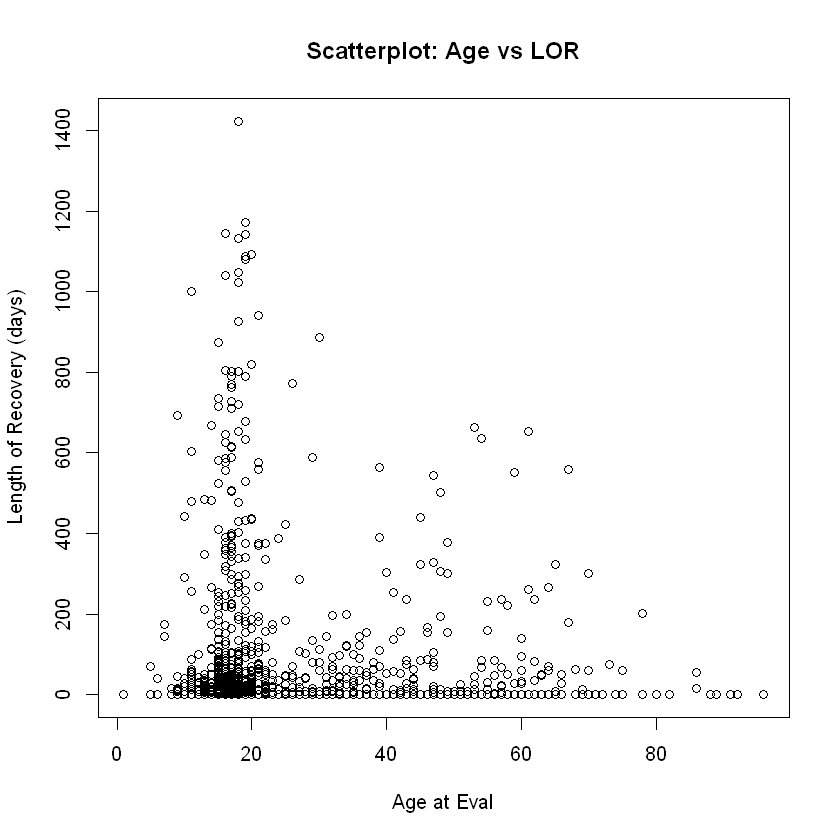

In [13]:
attach(log_reg)
plot(age,LOR, main = "Scatterplot: Age vs LOR",
    xlab = "Age at Eval", ylab = "Length of Recovery (days)")


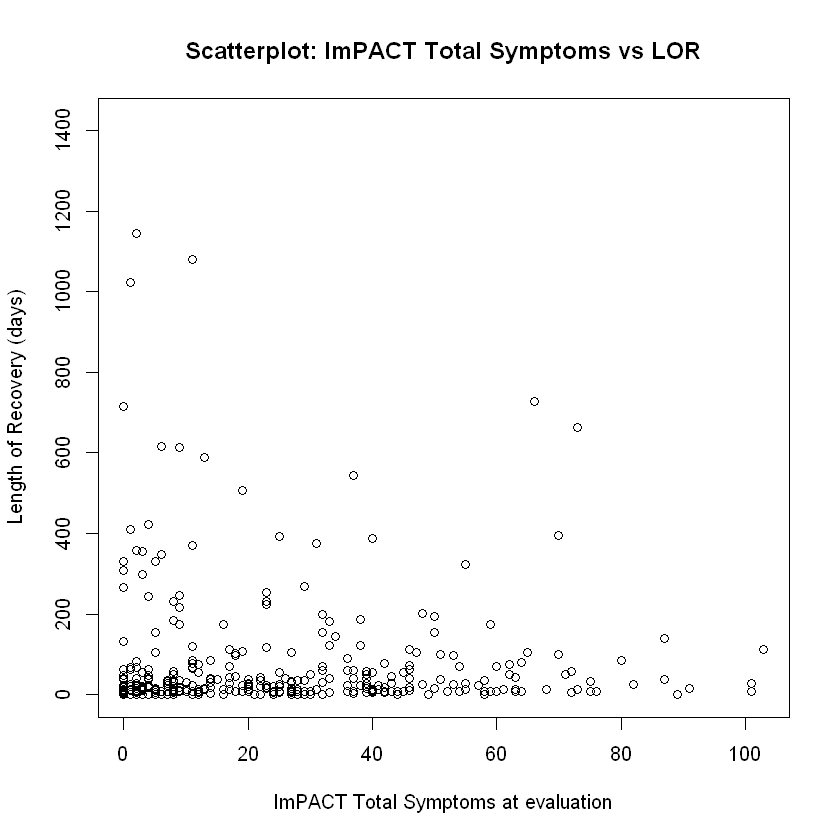

In [14]:
plot(CONCUSSION_SYMPTOMS_TOTAL_SCORE, LOR, main = "Scatterplot: ImPACT Total Symptoms vs LOR",
     xlab = "ImPACT Total Symptoms at evaluation", ylab= "Length of Recovery (days)")

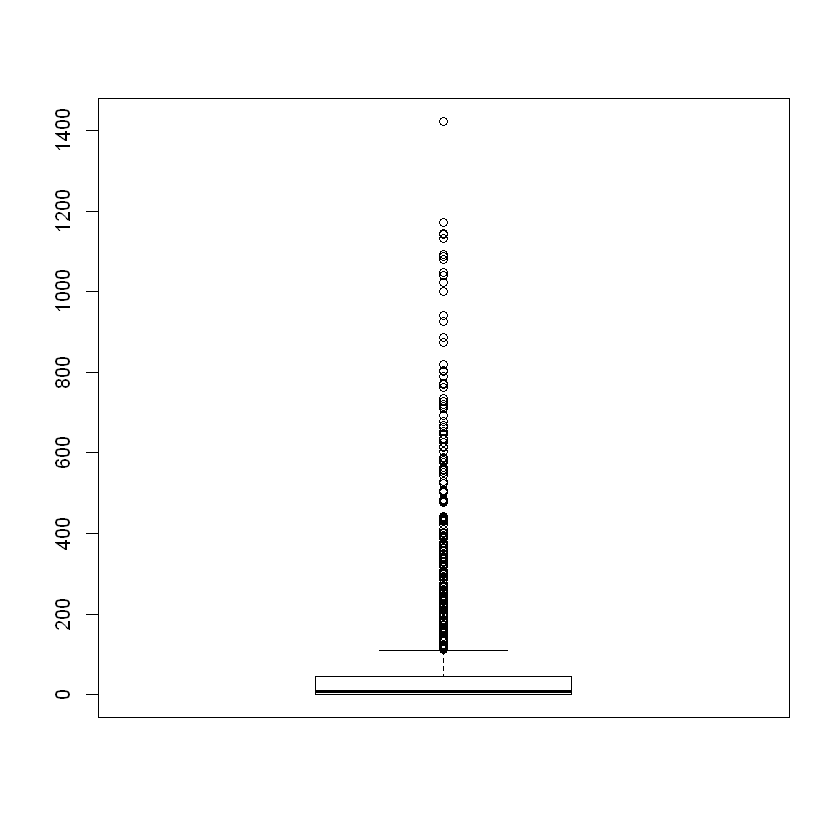

In [15]:
boxplot(log_reg[,'LOR'])